In [1]:
__depends__ = [
    "../sections/fitting_coefficients_table.tex",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UVIC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_BERN.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_LLNL.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CCSM1.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CLIMBER.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_MPI.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_FRCGC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UMD2.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_HADLEY.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CCCMA_CGCM3_1_T47.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CNRM_CM3.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CSIRO_MK3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GFDL_CM2_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GFDL_CM2_1.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GISS_MODEL_E_H.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GISS_MODEL_E_R.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_IAP_FGOALS1_0_G.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_INMCM3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_IPSL_CM4.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIROC3_2_HIRES.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIROC3_2_MEDRES.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIUB_ECHO_G.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MPI_ECHAM5.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MRI_CGCM2_3_2A.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_NCAR_CCSM3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_NCAR_PCM1.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_UKMO_HADCM3.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_UKMO_HADGEM1.CFG",
]
__dest__ = [
]

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Cell above is scons stuff to make sure our dependency tree work. We put a renaming in the cell below to make it clearer what is what.

In [3]:
FITTING_COEFFS_TEX = __depends__[0]
TUNING_FILES_CC = {
    v.split("C4MIP_")[-1].replace(".CFG", ""): v for v in __depends__[1:10]
}
TUNING_FILES_OCEAN = {
    v.split("FULLTUNE_")[-1].replace(".CFG", ""): v for v in __depends__[10:]
}

<IPython.core.display.Javascript object>

# Drivers of non-linearity

In this notebook we briefly analyse the drivers of non-linearity in model response.

## Imports

In [4]:
import pandas as pd
from pandas.compat import StringIO

from utils_magcfg import get_carbon_cycle_cfgs, get_ocean_tuning_cfgs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting Config

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from utils_plotting import setup, SAVE_KWARGS

setup()

<IPython.core.display.Javascript object>

## Constants

In [6]:
CC_TUNING_RENAMING = {
    "HADLEY": "Hadley",
    "MPI": "MPI",
    "CLIMBER": "CLIMBER",
    "BERN": "Bern",
    "UMD2": "UMD2",
    "UVIC": "UVic",
    "FRCGC": "FRCGC",
    "CCSM1": "CCSM1",
    "LLNL": "LLNL",
    "default": "Default",
}

<IPython.core.display.Javascript object>

In [7]:
OC_TUNING_RENAMING = {
    "CCCMA_CGCM3_1_T47": "CGCM3.1(T47)",
    "CNRM_CM3": "CNRM-CM3",
    "CSIRO_MK3_0": "CSIRO-Mk3.0",
    "GFDL_CM2_0": "GFDL-CM2.0",
    "GFDL_CM2_1": "GFDL-CM2.1",
    "GISS_MODEL_E_H": "GISS-EH",
    "GISS_MODEL_E_R": "GISS-ER",
    "IAP_FGOALS1_0_G": "FGOALS-g1.0",
    "INMCM3_0": "INM-CM3.0",
    "IPSL_CM4": "IPSL-CM4",
    "MIROC3_2_HIRES": "MIROC3.2(hires)",
    "MIROC3_2_MEDRES": "MIROC3.2(medres)",
    "MIUB_ECHO_G": "ECHO-G",
    "MPI_ECHAM5": "ECHAM5/MPI-OM",
    "MRI_CGCM2_3_2A": "MRI-CGCM2.3.2",
    "NCAR_CCSM3_0": "CCSM3",
    "NCAR_PCM1": "PCM",
    "UKMO_HADCM3": "UKMO-HadCM3",
    "UKMO_HADGEM1": "UKMO-HadGEM1",
}

<IPython.core.display.Javascript object>

In [8]:
SHOW_PLOTS = False and not strtobool(
    os.getenv("CI", "False")
)  # turn on if using the notebooks interactively

CARBON_CYCLES = get_carbon_cycle_cfgs(TUNING_FILES_CC)
OCEAN_TUNINGS = get_ocean_tuning_cfgs(TUNING_FILES_OCEAN)

<IPython.core.display.Javascript object>

In [9]:
def create_named_series(indict, mapper):
    assert len(indict) == 1, indict
    out = pd.Series(list(indict.values())[0])
    out.name = mapper[list(indict.keys())[0]]

    return out


cc_df = pd.concat(
    [create_named_series({k: v}, CC_TUNING_RENAMING) for k, v in CARBON_CYCLES.items()],
    axis=1,
    sort=False,
).T
cc_df

co2_detrituspool_initial  co2_feedbackfactor_detritus  \
UVic                      52.2373                    -0.180855   
Bern                      92.7738                    -0.135782   
LLNL                     103.1582                    -0.222341   
CCSM1                     56.7203                    -0.279810   
CLIMBER                   94.5397                    -0.263155   
MPI                       72.1718                    -0.057642   
FRCGC                     32.6689                     0.399463   
UMD2                      70.4359                    -0.299999   
Hadley                    61.2050                    -0.030814   
Default                   92.7738                    -0.135782   

         co2_feedbackfactor_gpp  co2_feedbackfactor_respiration  \
UVic                  -0.021659                        0.005733   
Bern                   0.010700                        0.068459   
LLNL                  -0.000422                       -0.007911   
CCSM1                  0.008768                       -0.016097   
CLIMBER                0.038027                        0.098442   
MPI                   -0.030182                       -0.024221   
FRCGC                  0.024352                       -0.199991   
UMD2                  -0.030724                        0.018158   
Hadley                -0.003198                        0.192292   
Default                0.010700                        0.068459   

         co2_feedbackfactor_soil  co2_fertilization_factor  \
UVic                    0.105623                  0.567677   
Bern                    0.154088                  0.648598   
LLNL                    0.218282                  1.034578   
CCSM1                   0.152235                  0.439670   
CLIMBER                 0.230024                  0.516472   
MPI                     0.068020                  1.054845   
FRCGC                   0.223615                  0.262525   
UMD2                    0.197303                  0.172221   
Hadley                  0.038570                  0.569113   
Default                 0.154088                  0.648598   

         co2_fertilization_method  co2_fraction_detritus_2_soil  \
UVic                     1.949179                      0.001006   
Bern                     1.100486                      0.001008   
LLNL                     1.000473                      0.001009   
CCSM1                    1.811535                      0.001035   
CLIMBER                  1.945731                      0.001000   
MPI                      1.000004                      0.001000   
FRCGC                    1.998614                      0.061806   
UMD2                     1.442343                      0.001001   
Hadley                   1.999655                      0.001000   
Default                  1.100486                      0.001008   

         co2_fraction_gpp_2_detritus  co2_fraction_gpp_2_plant  \
UVic                    1.323503e-05                  0.691377   
Bern                    3.998165e-01                  0.448261   
LLNL                    3.097526e-01                  0.574032   
CCSM1                   3.472068e-01                  0.484813   
CLIMBER                 4.068698e-01                  0.451745   
MPI                     5.732079e-01                  0.218303   
FRCGC                   2.264556e-01                  0.659712   
UMD2                    8.205567e-06                  0.885279   
Hadley                 -8.691671e-09                  1.000000   
Default                 3.998165e-01                  0.448261   

         co2_fraction_plant_2_detritus  co2_gpp_initial  \
UVic                          0.998999          61.8993   
Bern                          0.998902          66.2716   
LLNL                          0.999000          66.8000   
CCSM1                         0.999000          66.5843   
CLIMBER                       0.982545          64.4433   
MPI                           0.998857    

<IPython.core.display.Javascript object>

In [10]:
ocean_df = pd.concat(
    [create_named_series({k: v}, OC_TUNING_RENAMING) for k, v in OCEAN_TUNINGS.items()],
    axis=1,
    sort=False,
).T
ocean_df

core_amplify_ocn2land_heatxchng  core_climatesensitivity  \
CGCM3.1(T47)                             1.000000                 2.974686   
CNRM-CM3                                 1.000011                 2.982822   
CSIRO-Mk3.0                              1.354335                 2.235193   
GFDL-CM2.0                               1.304944                 2.305893   
GFDL-CM2.1                               1.333223                 2.281971   
GISS-EH                                  1.000014                 2.536848   
GISS-ER                                  1.233729                 2.256918   
FGOALS-g1.0                              1.083199                 2.422301   
INM-CM3.0                                1.230306                 2.351452   
IPSL-CM4                                 1.012900                 4.147471   
MIROC3.2(hires)                          1.003106                 5.734435   
MIROC3.2(medres)                         1.179775                 3.996056   
ECHO-G                                   1.199668                 2.625587   
ECHAM5/MPI-OM                            1.245118                 3.229222   
MRI-CGCM2.3.2                            1.180076                 2.476094   
CCSM3                                    1.215644                 2.136458   
PCM                                      1.000000                 1.895662   
UKMO-HadCM3                              1.393490                 3.207403   
UKMO-HadGEM1                             1.000007                 2.998252   

                  core_delq2xco2  core_feedback_qsensitivity  \
CGCM3.1(T47)                3.32               -9.557780e-10   
CNRM-CM3                    3.48               -5.999904e-09   
CSIRO-Mk3.0                 3.47               -1.145078e-09   
GFDL-CM2.0                  3.50                5.510798e-02   
GFDL-CM2.1                  3.50                4.986113e-02   
GISS-EH                     4.06                8.802576e-08   
GISS-ER                     4.06                7.499995e-02   
FGOALS-g1.0                  NaN                7.499999e-02   
INM-CM3.0                    NaN                1.369161e-06   
IPSL-CM4                    3.48                2.597328e-09   
MIROC3.2(hires)             3.14                3.962764e-06   
MIROC3.2(medres)            3.09               -5.928886e-11   
ECHO-G                       NaN                7.787604e-11   
ECHAM5/MPI-OM               4.01                7.499999e-02   
MRI-CGCM2.3.2               3.47                1.279540e-08   
CCSM3                       3.95                6.408938e-02   
PCM                          NaN               -3.452208e-10   
UKMO-HadCM3                 3.81                3.180860e-11   
UKMO-HadGEM1                3.78                7.499992e-02   

                  core_heatxchange_landocean  core_heatxchange_northsouth  \
CGCM3.1(T47)                        0.684963                     1.033451   
CNRM-CM3                            0.219813                     0.200000   
CSIRO-Mk3.0                         1.999997                     0.200000   
GFDL-CM2.0                          2.000000                     0.200024   
GFDL-CM2.1                          1.999997                     0.200013   
GISS-EH                             0.200051                     0.579981   
GISS-ER                             1.996257                     1.999956   
FGOALS-g1.0                         1.999995                     0.200005   
INM-CM3.0                           1.999966                     0.289504   
IPSL-CM4                            0.722836                     2.000000   
MIROC3.2(hires)                     1.992550                     1.929593   
MIROC3.2(medres)                    1.999999                     0.315862   
ECHO-G                              1.999257                     0.290995   
ECHAM5/MPI-OM                       2.000000                     1.215654   
MRI-CGCM2.3.2        

<IPython.core.display.Javascript object>

In [11]:
# thank you https://stackoverflow.com/a/53525736
with open(FITTING_COEFFS_TEX) as input_file:
    text = ""
    hit_data = False
    for line in input_file:
        if "\\midrule" in line:
            hit_data = True
        if not hit_data:
            continue
        if "&" in line:
            text += line.replace("\\", "") + "\n"

data = StringIO(text)
coeffs = pd.read_csv(
    data,
    sep="&",
    names=["Tuning", "T_2x", "C_2x", "TCRE", "alpha_1pctCO2", "alpha_nz", "gamma_nz"],
)
data.close()
coeffs = coeffs[coeffs["Tuning"] != "Default"]
coeffs = coeffs.set_index("Tuning")
coeffs.index.name = None
coeffs.index = coeffs.index.map(lambda x: "(".join(x.split("(")[:-1]).strip())
coeffs = coeffs.drop("", axis=0)
coeffs

T_2x  C_2x  TCRE  alpha_1pctCO2  alpha_nz  gamma_nz
Bern              1.97  4168  1.74           8094      7969      0.94
CCSM1             1.97  3927  1.84           7712      9405      0.98
CLIMBER           1.97  3976  1.82           9493     14644      1.00
FRCGC             1.97  3593  2.01           9406     10608      1.01
Hadley            1.97  3903  1.85          16202    170522      1.03
LLNL              1.97  4864  1.49           6730      8800      0.93
MPI               1.97  4078  1.77           7640      5011      0.88
UMD2              1.97  3187  2.27           7099      5183      1.04
UVic              1.97  4076  1.78          13403     26328      1.02
CGCM3.1(T47)      2.03  4149  1.79           6513      7523      0.94
CNRM-CM3          1.98  4164  1.74           7311      8299      0.93
CSIRO-Mk3.0       1.40  4299  1.20           9411      6559      0.89
GFDL-CM2.0        1.66  4240  1.43           7939      8048      0.85
GFDL-CM2.1        1.54  4273  1.32          11566      8267      0.84
GISS-EH           1.77  4210  1.54           6835      6562      0.86
GISS-ER           1.50  4278  1.29           9749      9876      0.85
FGOALS-g1.0       1.74  4231  1.51          13545     11455      0.83
INM-CM3.0         1.80  4197  1.57           5603      5212      0.86
IPSL-CM4          2.22  4114  1.98           9433     14175      1.03
MIROC3.2(hires)   2.72  4016  2.49          22609     61262      1.17
MIROC3.2(medres)  2.00  4180  1.75          20502     19261      1.04
ECHO-G            2.09  4122  1.86           4345      5183      0.86
ECHAM5/MPI-OM     2.22  4130  1.97          18411     44080      0.91
MRI-CGCM2.3.2     1.76  4212  1.53           6564      5934      0.88
CCSM3             1.55  4266  1.33           8603      7770      0.83
PCM               1.45  4273  1.24           4368      4381      0.82
UKMO-HadCM3       2.16  4122  1.92           7179      8208      0.96
UKMO-HadGEM1      2.06  4145  1.82           7206     10495      0.91

<IPython.core.display.Javascript object>

In [20]:
ocean_data = pd.concat(
    [coeffs.loc[ocean_df.index.values, :], ocean_df], axis=1, sort=True
)
ocean_data["alpha_nz/C_2x"] = ocean_data["alpha_nz"] / ocean_data["C_2x"]
ocean_data

T_2x  C_2x  TCRE  alpha_1pctCO2  alpha_nz  gamma_nz  \
CCSM3             1.55  4266  1.33           8603      7770      0.83   
CGCM3.1(T47)      2.03  4149  1.79           6513      7523      0.94   
CNRM-CM3          1.98  4164  1.74           7311      8299      0.93   
CSIRO-Mk3.0       1.40  4299  1.20           9411      6559      0.89   
ECHAM5/MPI-OM     2.22  4130  1.97          18411     44080      0.91   
ECHO-G            2.09  4122  1.86           4345      5183      0.86   
FGOALS-g1.0       1.74  4231  1.51          13545     11455      0.83   
GFDL-CM2.0        1.66  4240  1.43           7939      8048      0.85   
GFDL-CM2.1        1.54  4273  1.32          11566      8267      0.84   
GISS-EH           1.77  4210  1.54           6835      6562      0.86   
GISS-ER           1.50  4278  1.29           9749      9876      0.85   
INM-CM3.0         1.80  4197  1.57           5603      5212      0.86   
IPSL-CM4          2.22  4114  1.98           9433     14175      1.03   
MIROC3.2(hires)   2.72  4016  2.49          22609     61262      1.17   
MIROC3.2(medres)  2.00  4180  1.75          20502     19261      1.04   
MRI-CGCM2.3.2     1.76  4212  1.53           6564      5934      0.88   
PCM               1.45  4273  1.24           4368      4381      0.82   
UKMO-HadCM3       2.16  4122  1.92           7179      8208      0.96   
UKMO-HadGEM1      2.06  4145  1.82           7206     10495      0.91   

                  core_amplify_ocn2land_heatxchng  core_climatesensitivity  \
CCSM3                                    1.215644                 2.136458   
CGCM3.1(T47)                             1.000000                 2.974686   
CNRM-CM3                                 1.000011                 2.982822   
CSIRO-Mk3.0                              1.354335                 2.235193   
ECHAM5/MPI-OM                            1.245118                 3.229222   
ECHO-G                                   1.199668                 2.625587   
FGOALS-g1.0                              1.083199                 2.422301   
GFDL-CM2.0                               1.304944                 2.305893   
GFDL-CM2.1                               1.333223                 2.281971   
GISS-EH                                  1.000014                 2.536848   
GISS-ER                                  1.233729                 2.256918   
INM-CM3.0                                1.230306                 2.351452   
IPSL-CM4                                 1.012900                 4.147471   
MIROC3.2(hires)                          1.003106                 5.734435   
MIROC3.2(medres)                         1.179775                 3.996056   
MRI-CGCM2.3.2                            1.180076                 2.476094   
PCM                                      1.000000                 1.895662   
UKMO-HadCM3                              1.393490                 3.207403   
UKMO-HadGEM1                             1.000007                 2.998252   

                  core_delq2xco2  core_feedback_qsensitivity  \
CCSM3                       3.95                6.408938e-02   
CGCM3.1(T47)                3.32               -9.557780e-10   
CNRM-CM3                    3.48               -5.999904e-09   
CSIRO-Mk3.0                 3.47               -1.145078e-09   
ECHAM5/MPI-OM               4.01                7.499999e-02   
ECHO-G                       NaN                7.787604e-11   
FGOALS-g1.0                  NaN                7.499999e-02   
GFDL-CM2.0                  3.50                5.510798e-02   
GFDL-CM2.1                  3.50                4.986113e-02   
GISS-EH                     4.06                8.802576e-08   
GISS-ER                     4.06                7.499995e-02   
INM-CM3.0                    NaN                1.369161e-06   
IPSL-CM4                    3.48                2.597328e-09   
MIROC3.2(hires)             3.14                3.962764e-06   
MIROC3.2(medres)            3.09    

<IPython.core.display.Javascript object>

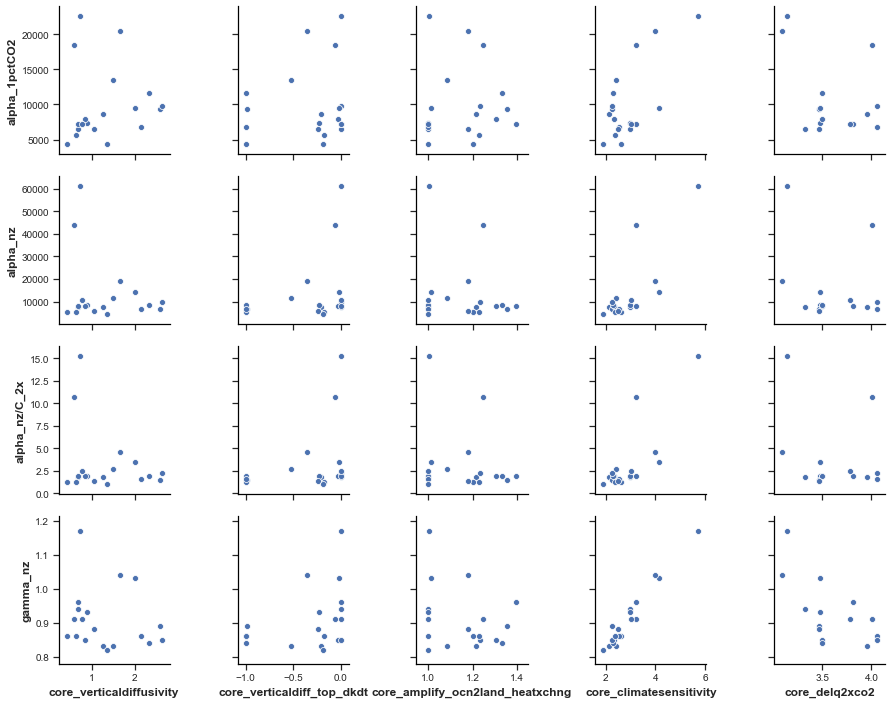

<IPython.core.display.Javascript object>

In [22]:
cols_of_interest_x = [
    "core_verticaldiffusivity",
    "core_verticaldiff_top_dkdt",
    "core_amplify_ocn2land_heatxchng",
    "core_climatesensitivity",
    "core_delq2xco2",
]
cols_of_interest_y = ["alpha_1pctCO2", "alpha_nz", "alpha_nz/C_2x", "gamma_nz"]
sns.pairplot(data=ocean_data, x_vars=cols_of_interest_x, y_vars=cols_of_interest_y)